In [62]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [63]:
df=pd.read_csv('crime_data.csv')
df.head()

,Unnamed: 0,Murder,Assault,UrbanPop,Rape
0,Alabama,13.2,236,58,21.2
1,Alaska,10.0,263,48,44.5
2,Arizona,8.1,294,80,31.0
3,Arkansas,8.8,190,50,19.5
4,California,9.0,276,91,40.6


In [64]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  50 non-null     object 
 1   Murder      50 non-null     float64
 2   Assault     50 non-null     int64  
 3   UrbanPop    50 non-null     int64  
 4   Rape        50 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 2.1+ KB


In [65]:
df.isnull().sum()

Unnamed: 0    0
Murder        0
Assault       0
UrbanPop      0
Rape          0
dtype: int64

In [66]:
df.duplicated().sum()

0

In [67]:
# Heirarchical clustring
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering

In [68]:
def norm_finc(i):
    x = (i-i.min()/(i.max()-i.min()))
    return (x)

In [69]:
df.iloc[:,1:]

,Murder,Assault,UrbanPop,Rape
0,13.2,236,58,21.2
1,10.0,263,48,44.5
2,8.1,294,80,31.0
3,8.8,190,50,19.5
4,9.0,276,91,40.6
5,7.9,204,78,38.7
6,3.3,110,77,11.1
7,5.9,238,72,15.8
8,15.4,335,80,31.9
9,17.4,211,60,25.8


In [70]:
from sklearn.preprocessing import MinMaxScaler
normalize=MinMaxScaler()
new_df=normalize.fit_transform(df.iloc[:,1:].to_numpy())
df_norm1=pd.DataFrame(new_df,columns=df.columns[1:])
df_norm1

,Murder,Assault,UrbanPop,Rape
0,0.746988,0.654110,0.440678,0.359173
1,0.554217,0.746575,0.271186,0.961240
2,0.439759,0.852740,0.813559,0.612403
3,0.481928,0.496575,0.305085,0.315245
4,0.493976,0.791096,1.000000,0.860465
5,0.427711,0.544521,0.779661,0.811370
6,0.150602,0.222603,0.762712,0.098191
7,0.307229,0.660959,0.677966,0.219638
8,0.879518,0.993151,0.813559,0.635659
9,1.000000,0.568493,0.474576,0.478036


In [71]:
df_norm=norm_finc(df.iloc[:,1:])
df_norm

,Murder,Assault,UrbanPop,Rape
0,13.151807,235.84589,57.457627,21.01137
1,9.951807,262.84589,47.457627,44.31137
2,8.051807,293.84589,79.457627,30.81137
3,8.751807,189.84589,49.457627,19.31137
4,8.951807,275.84589,90.457627,40.41137
5,7.851807,203.84589,77.457627,38.51137
6,3.251807,109.84589,76.457627,10.91137
7,5.851807,237.84589,71.457627,15.61137
8,15.351807,334.84589,79.457627,31.71137
9,17.351807,210.84589,59.457627,25.61137


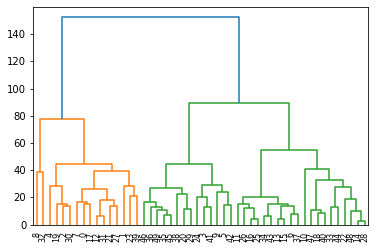

In [72]:
dendogram=sch.dendrogram(sch.linkage(df_norm,method='average'))

In [73]:
hc=AgglomerativeClustering(n_clusters=4,affinity='euclidean',linkage='average')

In [74]:
y_hc=hc.fit_predict(df_norm)

In [75]:
clusters=pd.DataFrame(y_hc,columns=['clusters'])

In [76]:
clusters

,clusters
0,1
1,1
2,1
3,2
4,1
5,2
6,0
7,1
8,3
9,2


In [77]:
df_norm['h_clusterid']=clusters

In [78]:
df_norm.sort_values('h_clusterid')

,Murder,Assault,UrbanPop,Rape,h_clusterid
18,2.051807,82.84589,50.457627,7.61137,0
40,3.751807,85.84589,44.457627,12.61137,0
34,7.251807,119.84589,74.457627,21.21137,0
33,0.751807,44.84589,43.457627,7.11137,0
28,2.051807,56.84589,55.457627,9.31137,0
26,4.251807,101.84589,61.457627,16.31137,0
25,5.951807,108.84589,52.457627,16.21137,0
48,2.551807,52.84589,65.457627,10.61137,0
22,2.651807,71.84589,65.457627,14.71137,0
43,3.151807,119.84589,79.457627,22.71137,0


In [81]:
df_norm.groupby('h_clusterid').mean()

,Murder,Assault,UrbanPop,Rape
h_clusterid,,,,
0,4.221807,87.395890,59.207627,14.201370
1,11.423236,263.345890,68.600484,28.811370
2,8.166093,173.131605,70.100484,22.654227
3,14.151807,335.845890,61.957627,23.811370


In [83]:
df_norm['h_clusterid'].value_counts()

0    20
1    14
2    14
3     2
Name: h_clusterid, dtype: int64

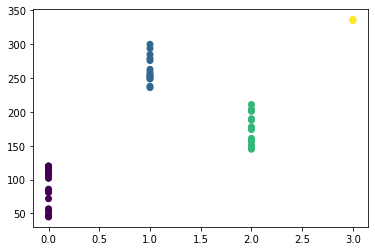

In [85]:
plt.scatter(df_norm['h_clusterid'],df_norm['Assault'],c=hc.labels_)